In [41]:

from imutils import paths
import numpy as np
import argparse
import imutils
import pickle
import cv2
import os

In [42]:
from tensorflow.keras.preprocessing import image
import tensorflow_addons as tfa
from tensorflow.keras.models import load_model
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [82]:
import tensorflow_addons as tfa
from tensorflow.keras.optimizers import Adam, Nadam, Adadelta,SGD
import os

# base_dir = 'data/'

# id1= len(os.listdir(base_dir+'/0'))
# id2 = len(os.listdir(base_dir+'/1'))
# id3 = len(os.listdir(base_dir+'/2'))
# id4 = len(os.listdir(base_dir+'/3'))
# id5 = len(os.listdir(base_dir+'/4'))
# id6 = len(os.listdir(base_dir+'/5'))
# id7=len(os.listdir(base_dir+'/6'))
# id8=len(os.listdir(base_dir+'/7'))

# print('total id1:', id1)
# print('total id2 :',id2)
# print('total id3 :', id3)
# print('total id4 :', id4)
# print('total id5 :', id5)
# print('total id6 :', id6)
# print('total id7 :', id7)
# print('total id8 :', id8)

# total_data = id1+id2+id3+id4+id5+id6+id7+id8
# print(total_data)


# # The data, split between train and test sets
# datagen = ImageDataGenerator(
# #             rotation_range=45,
# #             horizontal_flip=True,
# #             vertical_flip=True,
# #             rescale=1/255, 
# #             zoom_range=1.2,
#             validation_split=0.2) #Dataset dibagi menjadi 75% train set dan 25% validation set.

# train_generator = datagen.flow_from_directory(
#     base_dir,
#     target_size=(180, 80),
#     batch_size=2557,
#     class_mode='binary',
#     subset='training'
# )

# validation_generator = datagen.flow_from_directory(
#     base_dir,
#     target_size=(180, 80),
#     batch_size=2557,
#     class_mode='binary',
#     subset='validation'
# )

total id1: 319
total id2 : 325
total id3 : 330
total id4 : 318
total id5 : 330
total id6 : 330
total id7 : 321
total id8 : 284
2557
Found 2048 images belonging to 8 classes.
Found 509 images belonging to 8 classes.


In [135]:
# x_train, y_train = next(train_generator)
# x_test, y_test = next(validation_generator)
# x_train = x_train.astype('float32')
# x_test = x_test.astype('float32')
# y_train = y_train.astype('uint8')
# y_test = y_test.astype('uint8')
# # x_train /= 255.
# # x_test /= 255.
# input_image_shape = (x_train.shape[1], x_train.shape[2], 3)
# x_val = x_test
# y_val = y_test

In [ ]:
# embedding_size=128
# model = create_model((180,80,3),embedding_size)
# model.compile(loss=tfa.losses.triplet_semihard_loss, optimizer=Adam(0.001))


# img_data = preprocess_input(img_data)

# TESTING

In [52]:
x_val.shape

(64, 180, 80, 3)

In [3]:
from sklearn.svm import SVC
from tensorflow.keras.preprocessing import image
import tensorflow_addons as tfa
from tensorflow.keras.models import load_model
from keras.applications.vgg16 import preprocess_input
import numpy as np
from sklearn.preprocessing.label import LabelEncoder
import pickle

svc = SVC(C=10, gamma=0.0001, kernel="rbf",probability=True) # PUT THE PARAMETER FROM GRIDSEARCH WHILE TRAINING BEFORE
triplet_model = 'best_model_triplet5.hdf5'

model = load_model(triplet_model,compile=False)

x_embedding = pickle.loads(open('x_embed.pickle','rb').read())
y_embedding = pickle.loads(open('y_embed.pickle','rb').read())
le = pickle.loads(open('le.pickle', "rb").read())

svc.fit(x_embedding, y_embedding)

with open("recognizer.pikle", "wb") as h:
    pickle.dump(svc, h)
svm = pickle.loads(open('recognizer.pikle', "rb").read())


In [ ]:
x_embedding[0].shape

# Predict from image

In [11]:
%%time
img_path = 'frame_13.png'
img = image.load_img(img_path, target_size=(180, 80))
img_data = image.img_to_array(img)
img_data = np.expand_dims(img_data, axis=0)
img_embeddings = model.predict(img_data)

preds = svc.predict_proba(img_embeddings)[0]
j = np.argmax(preds)
proba = preds[j]
name = le.classes_[j]
preds

Wall time: 30 ms


array([2.59448898e-03, 2.15484509e-03, 9.83839895e-01, 8.99112719e-04,
       2.96578697e-03, 2.42073665e-03, 2.39155624e-03, 2.73357860e-03])

In [12]:
proba

0.9838398947417463

In [13]:
name

2

In [14]:
proba

0.9838398947417463

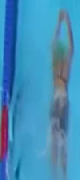

In [15]:
img